# Linear Regression

## Linear Regression Example

In [1]:
import pandas as pd
import quandl

Getting our data:

In [2]:
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


Adding new columns and restructuring that DF:

In [3]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [4]:
import math
forecast_col = 'Adj. Close'
df.fillna(-9999, inplace=True) #filling in missing data
forecast_out = int(math.ceil(0.01*len(df))) # #of days out
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.639972
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.078238
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,67.839414
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,68.912727
2004-08-25,53.164113,1.886792,1.183658,9188600.0,70.668146


In [5]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Defining our variables:

In [6]:
x = np.array(df.drop(['label'], 1))
x = preprocessing.scale(x)
y = np.array(df['label'])

Building and evaluating the model:

In [7]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
accuracy

0.97933400675449911

In [39]:
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
style.use('ggplot')

x_lately = x[-forecast_out:]
x = x[:-forecast_out]
forecast_set = clf.predict(x_lately)

In [40]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

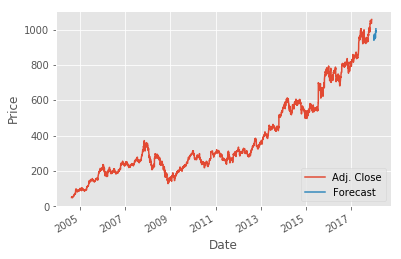

In [41]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Implementing Linear Regression by Hand

In [42]:
from statistics import mean
import numpy as np

In [43]:
xs = np.array([1,2,3,4,5,6])
ys = np.array([5,4,6,5,6,7])

In [44]:
def bestFitSlopeAndIntercept(xs, ys):
    m = (((mean(xs) * mean(ys))-mean(xs*ys))/
        ((mean(xs))**2 - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m, b

In [45]:
m, b = bestFitSlopeAndIntercept(xs, ys)
regressionLine = [(m*x)+b for x in xs]

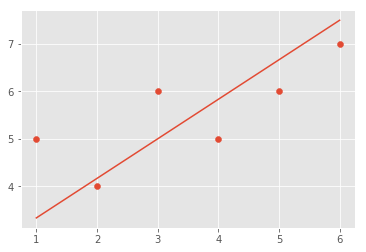

In [46]:
plt.scatter(xs, ys)
plt.plot(xs, regressionLine)
plt.show()

Accuracy:

In [32]:
def squaredError(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

In [37]:
def coefficientDetermination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squaredError(ys_orig, ys_line)
    squared_error_y_mean = squaredError(ys_orig, y_mean_line)
    return 1-(squared_error_regr/ squared_error_y_mean)

In [38]:
r_squared = coefficientDetermination(ys, regressionLine)
r_squared

0.25793650793650791